In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


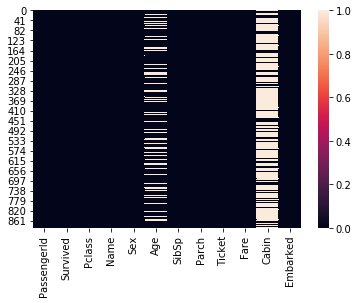

In [4]:
sns.heatmap(data.isna())

In [5]:
data.Ticket.value_counts()

347082               7
1601                 7
CA. 2343             7
3101295              6
CA 2144              6
347088               6
382652               5
S.O.C. 14879         5
113781               4
19950                4
W./C. 6608           4
2666                 4
PC 17757             4
113760               4
LINE                 4
347077               4
4133                 4
349909               4
17421                4
C.A. 31921           3
347742               3
239853               3
248727               3
24160                3
363291               3
29106                3
PC 17760             3
110413               3
345773               3
PC 17572             3
                    ..
349239               1
244278               1
345770               1
113804               1
PP 4348              1
C.A. 17248           1
4136                 1
STON/O 2. 3101274    1
343120               1
343276               1
315151               1
218629               1
244361     

In [6]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

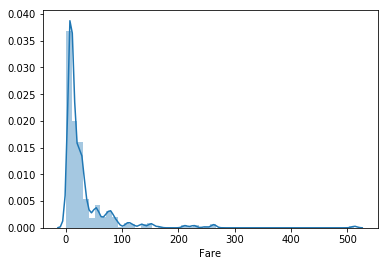

In [10]:
sns.distplot(data[~data.Fare.isna()]['Fare'])

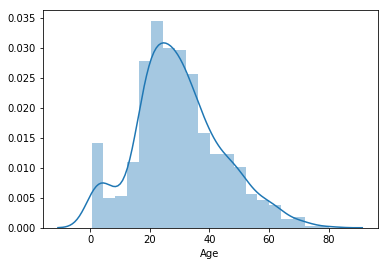

In [11]:
sns.distplot(data[~data.Age.isna()]['Age'])

In [12]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

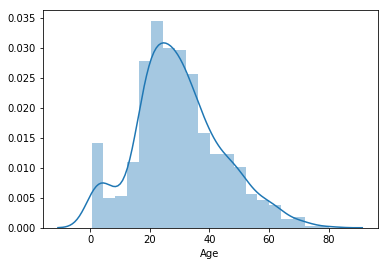

In [13]:
sns.distplot(data[~data.Age.isna()]['Age'])

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
def prepare_data(initial_data, train_data=True):
    prepared_data = pd.DataFrame()
    prepared_data['sex'] = pd.get_dummies(initial_data.Sex, drop_first=True)
    prepared_data = pd.concat([prepared_data, initial_data[['SibSp', 'Parch', 'Pclass', 'Fare']]], axis=1)
    prepared_data = pd.concat([prepared_data, pd.get_dummies(initial_data.Embarked, drop_first=True)], axis=1)
    if train_data:
        prepared_data = pd.concat([prepared_data, initial_data['Survived']], axis=1)
    return prepared_data

In [16]:
train_data = prepare_data(data)
train_data.head()

,sex,SibSp,Parch,Pclass,Fare,Q,S,Survived
0,1,1,0,3,7.2500,0,1,0
1,0,1,0,1,71.2833,0,0,1
2,0,0,0,3,7.9250,0,1,1
3,0,1,0,1,53.1000,0,1,1
4,1,0,0,3,8.0500,0,1,0


In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(train_data.drop('Survived', axis=1))
y = train_data['Survived']

In [18]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout


def build_classifier(optimizer,first_layer_units,second_lays_units, dropout_rate):
    classifier = Sequential()
    classifier.add(Dense(units = first_layer_units, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
    classifier.add(Dropout(dropout_rate))
    classifier.add(Dense(units = second_lays_units, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

Using TensorFlow backend.
/home/paulo/.virtualenvs/deep-learning/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [19]:
classifier = KerasClassifier(build_fn = build_classifier, verbose = 0)

parameters = {'batch_size': [5, 15, 30],
              'epochs': [100],
              'first_layer_units': [7, 4],
              'second_lays_units': [4, 7],
              'dropout_rate': [0, 0.2, 0.3],
              'optimizer': ['adam', 'rmsprop']}

## Esse passo demora muito,denpendendo dos parametros escolhidos,  recomendo rodar quando puder esperar muito tempo. Depende dos parametros escolhidos
# grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 5)
# grid_search = grid_search.fit(X, y)
# print('Best parameters:', grid_search.best_params_)
# print('Best accuracy:', grid_search.best_score_)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [21]:
# Escolhendo melhor classificador

classifiers = [GradientBoostingClassifier(), GradientBoostingClassifier(n_estimators=300), RandomForestClassifier(),RandomForestClassifier(n_estimators=300), RandomForestClassifier(class_weight='balanced'), \
               ExtraTreesClassifier(), ExtraTreesClassifier(class_weight='balanced') ,ExtraTreesClassifier(n_estimators=50), LogisticRegression(), XGBClassifier(n_estimators=50), LinearSVC(), LinearSVC(class_weight='balanced'),  \
               KerasClassifier(build_fn=build_classifier, batch_size= 15, dropout_rate=0.15, epochs=100, first_layer_units= 7, optimizer='rmsprop', second_lays_units= 7, verbose=0)]

X_train, X_test, y_train, y_test = train_test_split(X, y)

accuracies = []

for classifier in classifiers:
    print(str(classifier))
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    accuracies.append({classifier: accuracy_score(y_test, pred)})
#     print(classification_report(y_test, pred))
    print(accuracy_score(y_test, pred))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.829596412556
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.793721973094
RandomForestClassifier(boots

In [22]:
# Gerando arquivo para submissao
classifier = GradientBoostingClassifier(n_estimators=300)
classifier.fit(X, y)
data_sub = pd.read_csv('test.csv')
data_sub_prepared = prepare_data(data_sub, train_data=False)
# Preenchendo linha do arquivo de teste com fare NaN
data_sub_prepared.loc[data_sub_prepared[data_sub_prepared.Fare.isna()].index, 'Fare'] = data_sub_prepared[(data_sub_prepared.sex == 1) &( data_sub_prepared.SibSp ==0) &( data_sub_prepared.Parch ==0) &( data_sub_prepared.Pclass ==3)  &( data_sub_prepared.Q ==0)  &( data_sub_prepared.S ==1) ].Fare.mean()
data_sub_prepared = sc.transform(data_sub_prepared)
data_sub['Survived'] = classifier.predict(data_sub_prepared)
data_sub = data_sub[['PassengerId' , 'Survived']]
data_sub.to_csv('submisson_gbc.csv', index=False)
data_sub.Survived.value_counts()

0    272
1    146
Name: Survived, dtype: int64